In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
#data to read in 
df_chang = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
df_dong = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_huai = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
df_wanl = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')

In [3]:
#function to change year, month, day, and hour to datetime, set date as the index, and remove features: 
#year, month, day, and hour
def set_datetime(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('date', inplace=True)
    df.drop(columns=['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

In [4]:
#set_datetime(df) on all stations
df_chang = set_datetime(df_chang)
df_dong = set_datetime(df_dong)
df_huai = set_datetime(df_huai)
df_wanl = set_datetime(df_wanl)

#sanity check on station Changping
display(df_chang.head())

#info on df_chang
display(df_chang.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34290 non-null  float64
 2   PM10     34482 non-null  float64
 3   SO2      34436 non-null  float64
 4   NO2      34397 non-null  float64
 5   CO       33543 non-null  float64
 6   O3       34460 non-null  float64
 7   TEMP     35011 non-null  float64
 8   PRES     35014 non-null  float64
 9   DEWP     35011 non-null  float64
 10  RAIN     35013 non-null  float64
 11  wd       34924 non-null  object 
 12  WSPM     35021 non-null  float64
 13  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 4.0+ MB


None

In [5]:
#value_counts() on wd - wind direction 
print('Changping Station:')
display(df_chang['wd'].value_counts())
display(df_chang['wd'].nunique())

Changping Station:


NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

16

Each station has 16 unique `wd` (wind direction) values:
- N: north
- NW: north west
- NNW: north north west
- NE: north east
- NNE: north north east
---
- S: south 
- SW: south west
- SSW: south south west
- SE: south east
- SSE: south south east
---
- E: east
- ENE: east north east
- ESE: east south east
---
- W: west
- WNW: west north west
- WSW: west south west

In [6]:
#resampling to weekly average
df_chang_avg = df_chang.resample('W').mean()
df_dong_avg = df_dong.resample('W').mean()
df_huai_avg = df_huai.resample('W').mean()
df_wanl_avg = df_wanl.resample('W').mean()


#sanity check on station Changping
display(df_chang_avg.head())

#info on df_chang
display(df_chang_avg.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-03,36.5,31.986111,47.152778,31.732394,44.746479,868.957746,46.169014,1.915278,1019.633333,-16.231944,0.0000,1.475000
2013-03-10,156.5,119.226190,161.827381,51.397634,73.095972,1814.933333,78.023810,8.389286,1005.801786,-8.870833,0.0000,1.848810
2013-03-17,324.5,153.273810,166.125000,54.386905,79.154762,1756.652695,76.898810,6.120238,1011.125595,-4.038095,0.0125,1.366071
2013-03-24,492.5,52.351190,71.607143,11.017857,36.011905,827.285714,51.050825,4.301786,1006.700000,-6.970238,0.1250,2.010714
2013-03-31,660.5,99.500000,126.851190,24.535714,55.458333,1376.707483,39.350583,6.514286,1009.644048,-6.284524,0.0000,1.776190


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2013-03-03 to 2017-03-05
Freq: W-SUN
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      210 non-null    float64
 1   PM2.5   210 non-null    float64
 2   PM10    210 non-null    float64
 3   SO2     210 non-null    float64
 4   NO2     210 non-null    float64
 5   CO      210 non-null    float64
 6   O3      210 non-null    float64
 7   TEMP    210 non-null    float64
 8   PRES    210 non-null    float64
 9   DEWP    210 non-null    float64
 10  RAIN    210 non-null    float64
 11  WSPM    210 non-null    float64
dtypes: float64(12)
memory usage: 21.3 KB


None

In [37]:
df_chang_avg.tail()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2017-02-05,34428.5,63.184524,69.630952,23.053571,39.898810,1283.832335,40.285714,0.184911,1018.939286,-19.221429,0.000000,1.692262
2017-02-12,34596.5,34.718563,50.820359,12.652695,35.389222,864.071856,40.365269,0.254077,1020.342262,-17.055952,0.000000,2.612500
2017-02-19,34764.5,106.553571,122.470238,19.089286,64.708333,1605.952381,32.309524,3.022619,1014.766667,-11.985119,0.000000,2.082143
2017-02-26,34932.5,32.884615,42.834395,9.288462,37.583333,742.948718,39.211538,2.979167,1017.263690,-11.714881,0.011905,2.394643
2017-03-05,35040.5,32.791667,48.604167,9.957447,44.250000,804.255319,38.170213,8.900000,1011.083333,-9.593750,0.000000,1.970833


Before resampling had 35,064 entries now with taking the daily average have gone down to 1,461 observations. This makes sense there was 24 entries per day, and now it has only one. Not very ideal for time series but if it performs badly will go back to hourly.

In [7]:
#checking nulls for each station
df_list=[df_chang_avg, df_dong_avg, df_huai_avg, df_wanl_avg]

#total
print('Total null values:')
for df in df_list:
    print(df.isna().sum().sum())

print('\n')
#NO2
print('PM10 null values')   
for df in df_list:
    print(df['PM10'].isna().sum().sum())

Total null values:
0
17
0
7


PM10 null values
0
0
0
0


The total nulls for the station are all fairly low, the highest being 17 - Dongsi station located in the Dongsheng District (Beijing city center). 8% of the data is missing for Dongsi. The second highest is Wanliu station located in Haidian District with 7 total missing values. 3.3% of the data is missing.

The are no PM10 null values.

In [8]:
#.describe() on all stations
print("Changping Station:")
display(df_chang_avg['PM10'].describe()) 

print("Dongsi Station:")
display(df_dong_avg['PM10'].describe())

print("Huairou Station:")
display(df_huai_avg['PM10'].describe())

print("Wanliu Station:")
display(df_wanl_avg['PM10'].describe())

Changping Station:


count    210.000000
mean      94.096797
std       41.124107
min       21.119760
25%       63.352679
50%       85.598214
75%      117.800948
max      258.297619
Name: PM10, dtype: float64

Dongsi Station:


count    210.000000
mean     109.898521
std       47.055767
min       27.726190
25%       75.769461
50%      101.544251
75%      135.678571
max      279.307229
Name: PM10, dtype: float64

Huairou Station:


count    210.000000
mean      91.952825
std       40.450438
min       21.413174
25%       61.697917
50%       83.073218
75%      114.203247
max      273.300000
Name: PM10, dtype: float64

Wanliu Station:


count    210.000000
mean     110.165681
std       45.452116
min       25.994012
25%       73.209375
50%      102.906250
75%      137.296380
max      258.101190
Name: PM10, dtype: float64

The station with the highest median is the Wanliu station with 102.91 and the one with the lowest is the Huairou Station at 83.03. The highest max is Dongsi station is 279.31 and the lowest is Wanliu Station at 258.10. 

Wanliu Station for the lowest max is surprising since expeced Huairou which is a more rural area compared to it, to be the lowest. Also it had the highest median value. 

## Exploratory Data Analysis

### TEMP

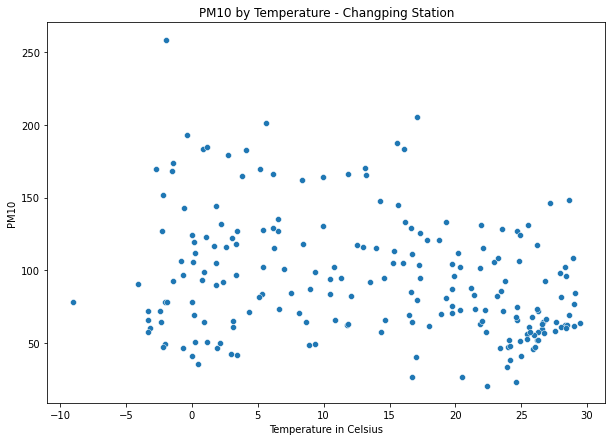

In [9]:
#temperature and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Changping Station');

There is not a signficant pattern between PM10 and temperature other than there the hotter it gets the more PM10 readings are clustered. 

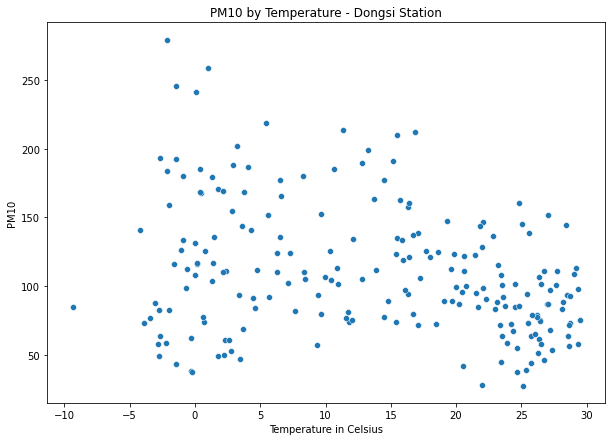

In [10]:
#temperature and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Dongsi Station');

This chart follows the same pattern or lack thereof as Changping with it being more spread out with colder temperature then being more clustered with high temperatures.

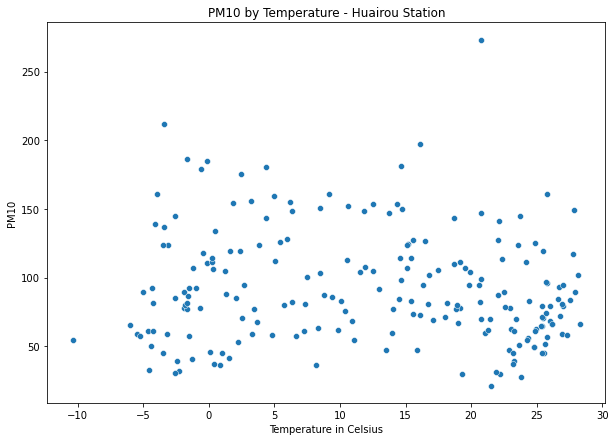

In [11]:
#temperature and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Huairou Station');

This chart is similar to the ones before with being more clusters around higher temperatures; which could mean that higher temperatures are more prone to have any PM10 reading.

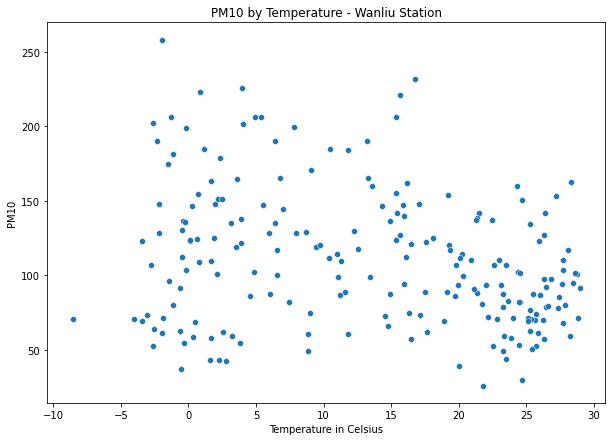

In [12]:
#temperature and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='TEMP', y= 'PM10', palette='Blues')
plt.xlabel('Temperature in Celsius')
plt.ylabel('PM10')
plt.title('PM10 by Temperature - Wanliu Station');

This chart is the same as the ones above it; although it is more spread out than the Huairou station when it comes to lower temperatures.

### PRES

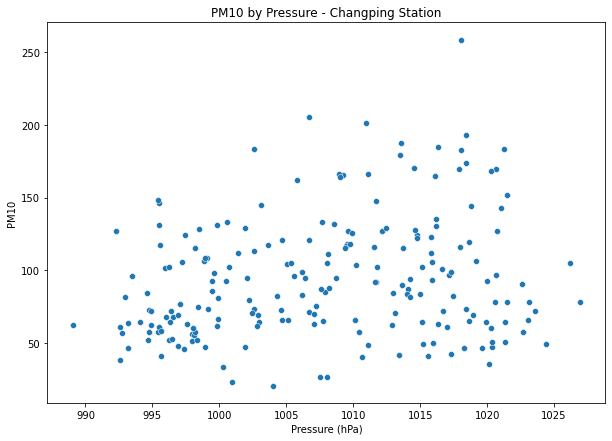

In [13]:
#pressure and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Changping Station');

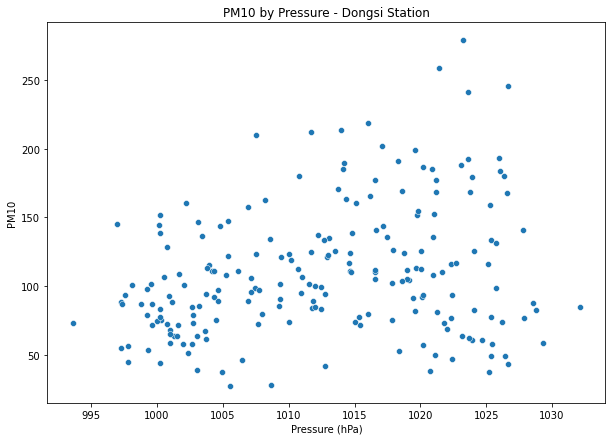

In [14]:
#pressure and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Dongsi Station');

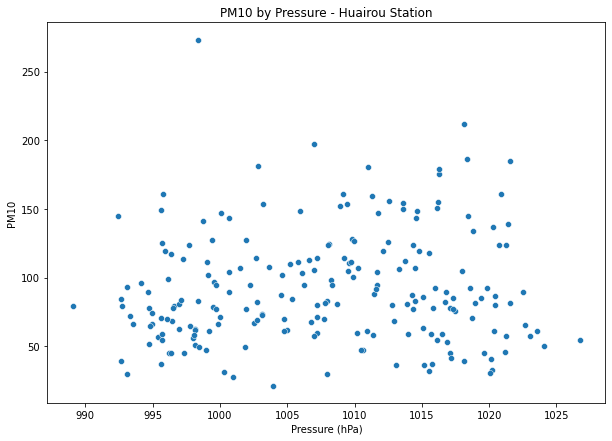

In [15]:
#pressure and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Huairou Station');

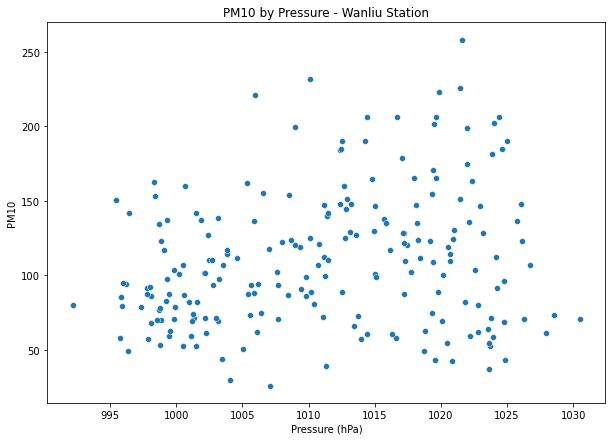

In [16]:
#pressure and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='PRES', y= 'PM10', palette='Blues')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM10')
plt.title('PM10 by Pressure - Wanliu Station');

For the scatterplots for the `PRES` feature can see they have similar charts; however there is not discernible patter to be found. Can see that Huairou has overall lower PM10 values which makes sense since it is located in the more rural district of the same name compared to the other station located more in the city center. 

### DEWP

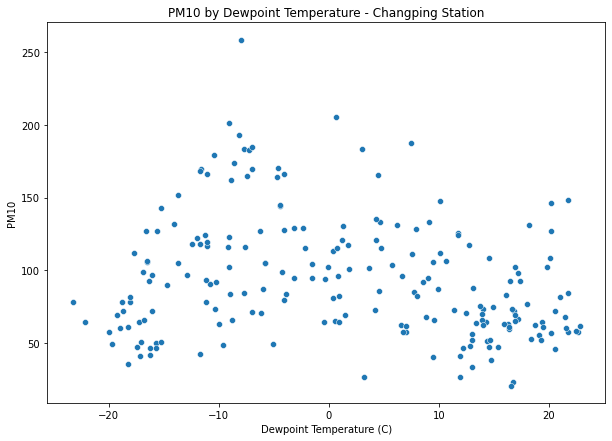

In [17]:
#DEWP and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Changping Station');

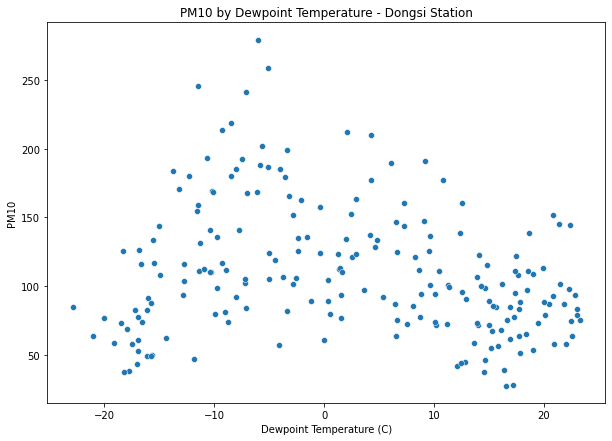

In [18]:
#DEWP and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Dongsi Station');

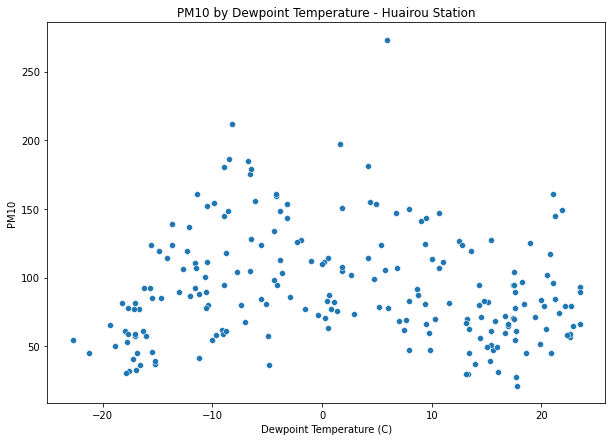

In [19]:
#DEWP and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Huairou Station');

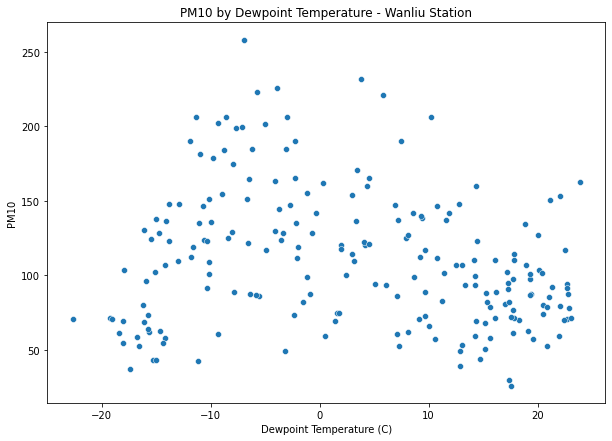

In [20]:
#DEWP and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='DEWP', y= 'PM10', palette='Blues')
plt.xlabel('Dewpoint Temperature (C)')
plt.ylabel('PM10')
plt.title('PM10 by Dewpoint Temperature - Wanliu Station');

Dewpoint temperature in celsius does not seem to have any relationship with the amount of PM10. This is true for all stations.

### RAIN

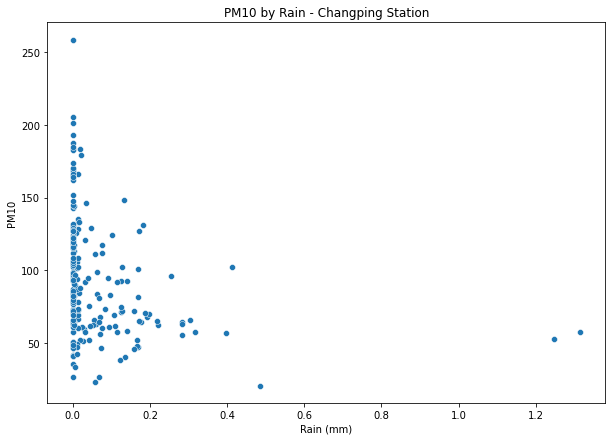

In [21]:
#RAIN and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Changping Station');

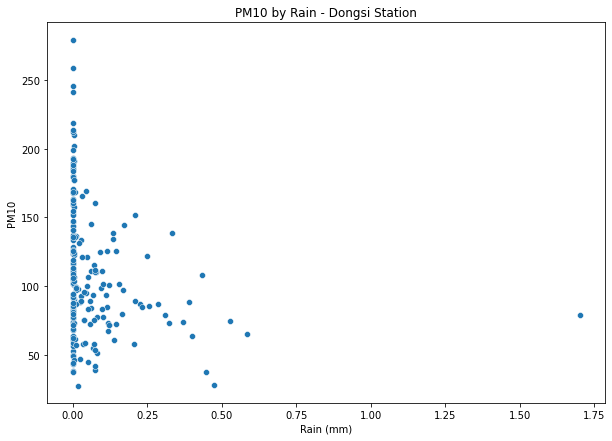

In [22]:
#RAIN and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Dongsi Station');

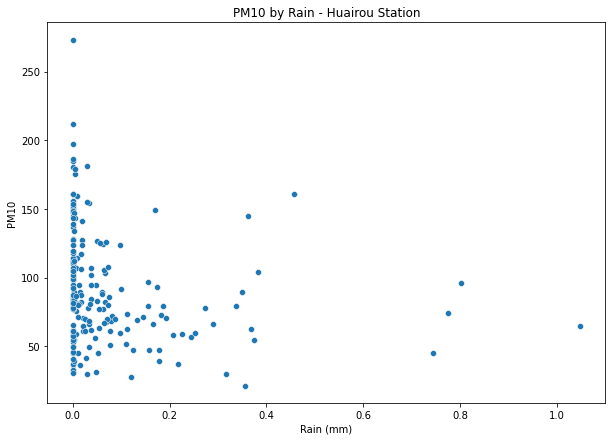

In [23]:
#RAIN and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Huairou Station');

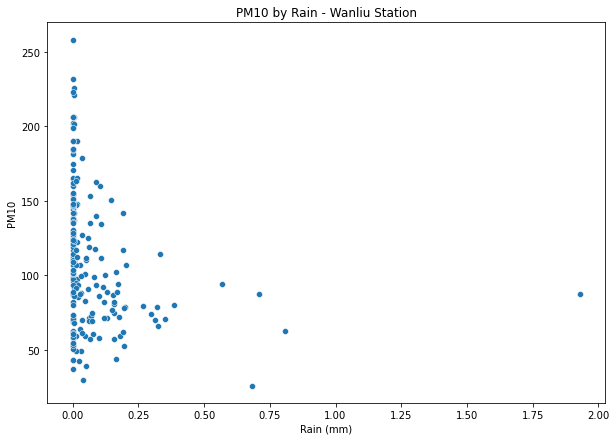

In [24]:
#RAIN and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='RAIN', y= 'PM10', palette='Blues')
plt.xlabel('Rain (mm)')
plt.ylabel('PM10')
plt.title('PM10 by Rain - Wanliu Station');

<b>Observations</b>
- None of the station's graphs gives any unique insights since most of the values of `RAIN` are 0.
- Can see that Huairou get more average weekly rain compared to the other districts.

### WSPM

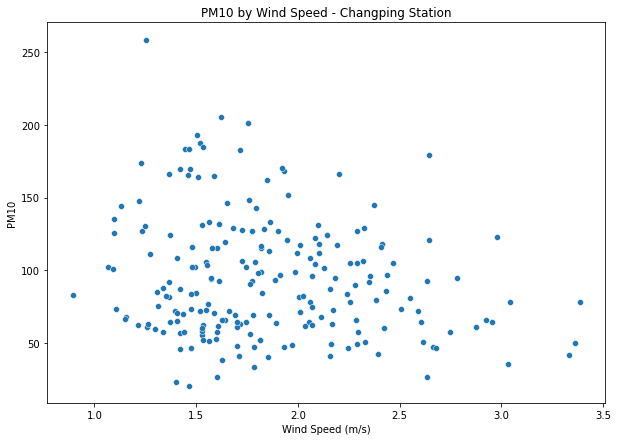

In [25]:
#WSPM and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Changping Station');

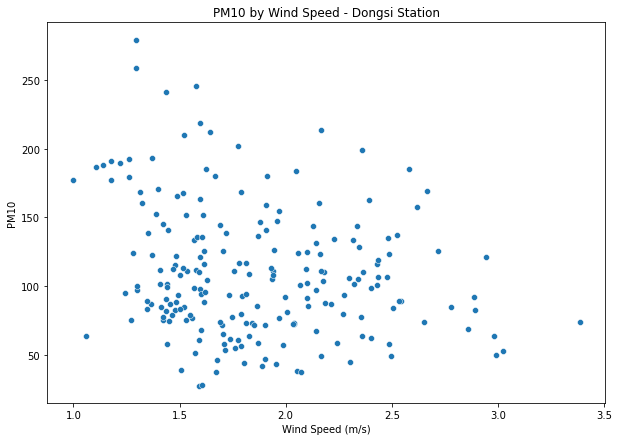

In [26]:
#WSPM and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Dongsi Station');

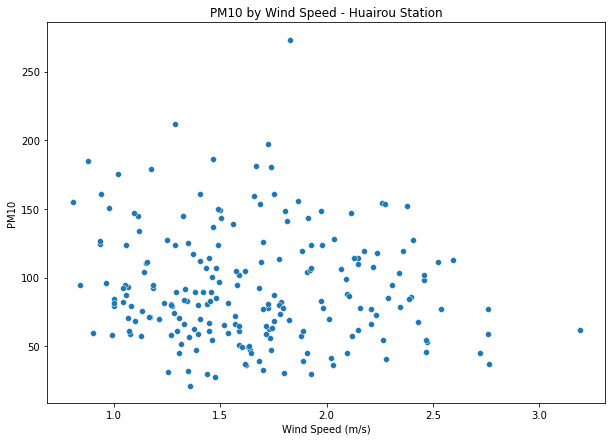

In [27]:
#WSPM and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Huairou Station');

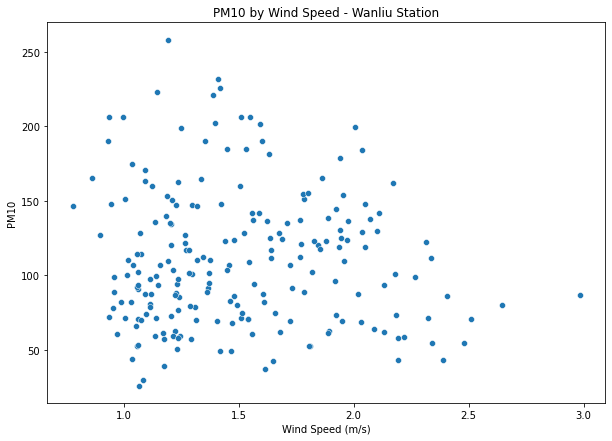

In [28]:
#WSPM and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='WSPM', y= 'PM10', palette='Blues')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM10')
plt.title('PM10 by Wind Speed - Wanliu Station');

Once again no real discernable patter/relationship between the amount of PM10 and the wind speed. The bulk of the observation seem to be between 1.0 and 1.5 for each station.

## Correlation Heatmap

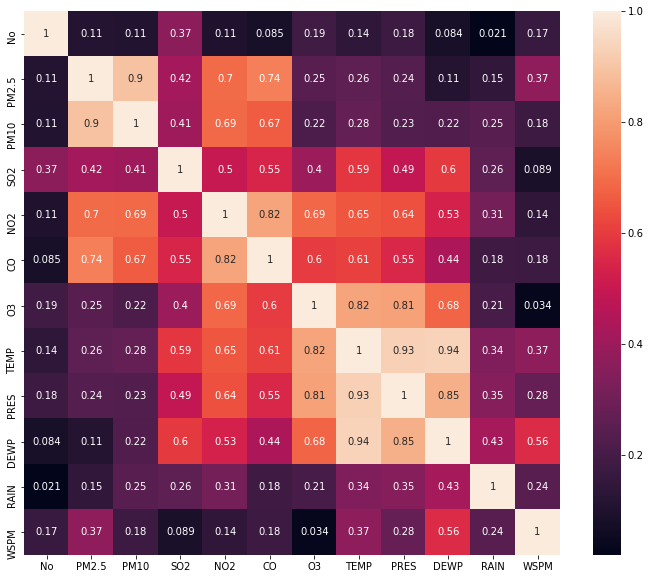

In [29]:
#Changping 
plt.figure(figsize=(12,10))
sns.heatmap(df_chang_avg.corr().abs(), annot=True)
plt.show()

From the Changping Station can see that PM10 has a high correlation with the other air pollutants the highest being PM2.5 (which make sense). But can further explore the relationship with feature `CO` and `NO2` which correlation value 0.67 and 0.69 respectively. 

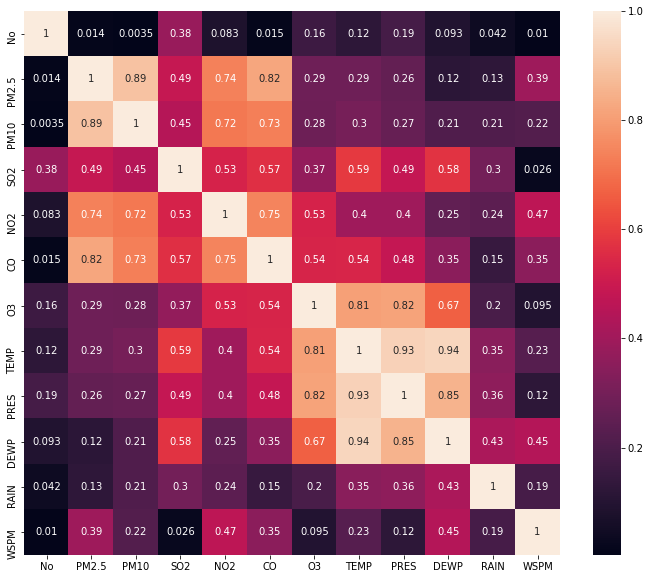

In [30]:
#Dongsi 
plt.figure(figsize=(12,10))
sns.heatmap(df_dong_avg.corr().abs(), annot=True)
plt.show()

For Dongsi can see it has the highest correlation after PM2.5 is with air pollutants `CO` and `NO2` - 0.73 and 0.72 respectively.

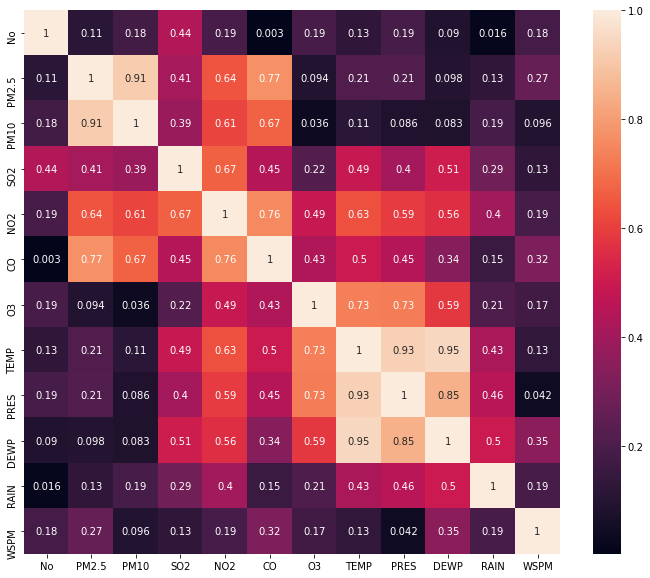

In [31]:
#Huairou 
plt.figure(figsize=(12,10))
sns.heatmap(df_huai_avg.corr().abs(), annot=True)
plt.show()

For Huairou the highest correlation after PM2.5 are once again with air pollutants `CO` and `NO2` - 0.67 and 0.61 respectively.

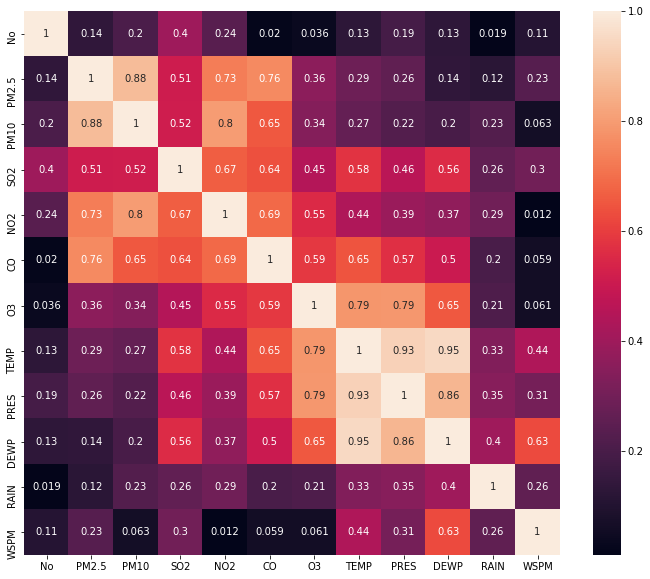

In [32]:
#Wanliu 
plt.figure(figsize=(12,10))
sns.heatmap(df_wanl_avg.corr().abs(), annot=True)
plt.show()

For Wanliu the highest correlation after PM2.5 are once again with air pollutants `CO` and `NO2` - 0.65 and 0.8 respectively. NO2 is highly correlated with NO2; worth looking into what human actions an increase of it.

### NO2

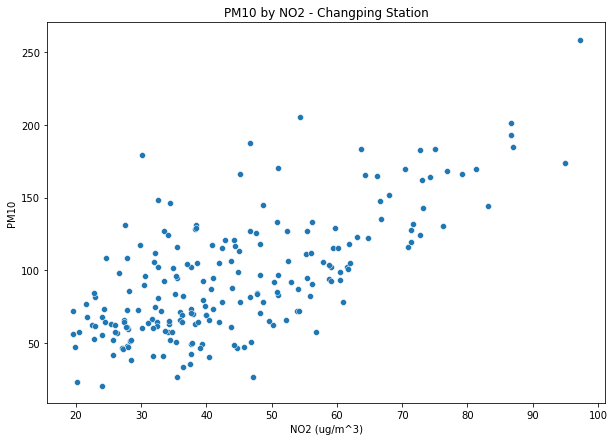

In [36]:
#NO2 and PM10 for Changping

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_chang_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (ug/m^3)')
plt.ylabel('PM10')
plt.title('PM10 by NO2 - Changping Station');

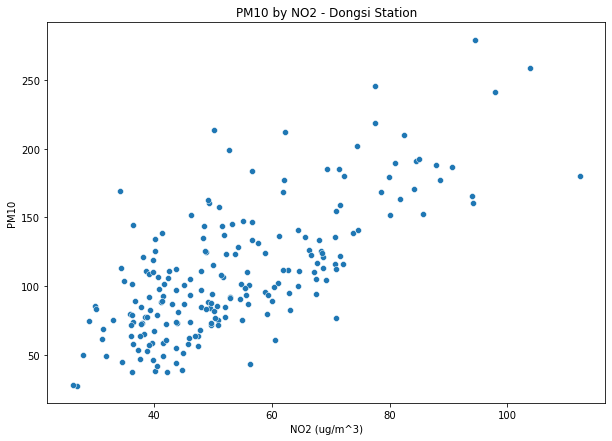

In [35]:
#NO2 and PM10 for Dongsi

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_dong_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (ug/m^3)')
plt.ylabel('PM10')
plt.title('PM10 by NO2 - Dongsi Station');

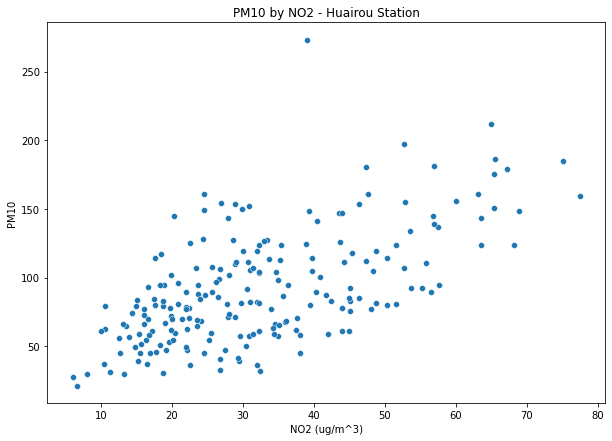

In [34]:
#NO2 and PM10 for Huairou

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_huai_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (ug/m^3)')
plt.ylabel('PM10')
plt.title('PM10 by NO2 - Huairou Station');

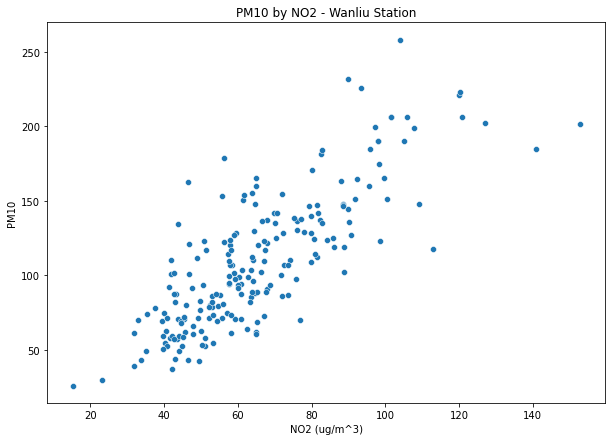

In [33]:
#NO2 and PM10 for Wanliu

plt.figure(figsize=(10,7))
sns.scatterplot(data = df_wanl_avg, x='NO2', y= 'PM10', palette='Blues')
plt.xlabel('NO2 (ug/m^3)')
plt.ylabel('PM10')
plt.title('PM10 by NO2 - Wanliu Station');

For all the stations can see that target variable PM10 and NO2 have positive linear relationship; so as one increases the other increases as well.

## Distribution of PM10

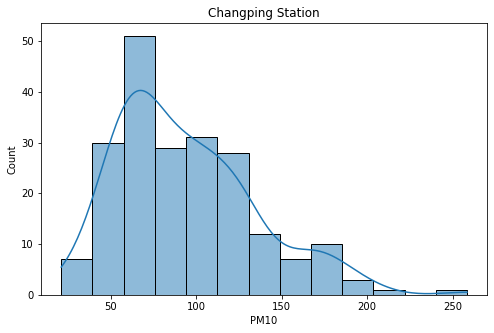

In [9]:
#histogram for Changping Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_chang_avg, x='PM10', kde=True)
plt.title("Changping Station");

Changping has a right (positive) skewed distribution with the bulk of PM10 being with the range of 50 to 150; trailing off to 250.

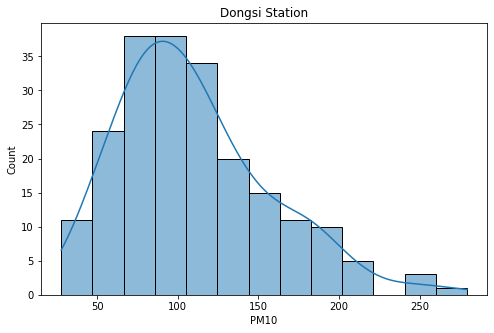

In [10]:
#histogram for Dongsi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_dong_avg, x='PM10', kde=True)
plt.title("Dongsi Station");

Dongsi has a right (positive) skewed distribtuion with the bulk of PM10 being within the range of 50 to 200; trailing off to 250.

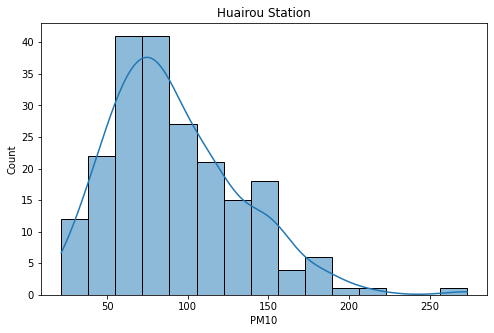

In [11]:
#histogram for Huairou Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_huai_avg, x='PM10', kde=True)
plt.title("Huairou Station");

Huairou has a right (positive) skewed distribution with the bulk of PM10 being within range 50 to 150; trailing off to 250.

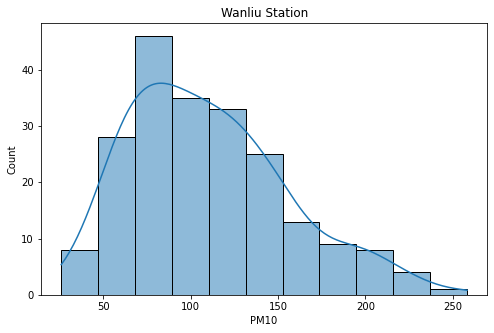

In [15]:
#histogram for Wanliu Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_wanl_avg, x='PM10', kde=True)
plt.title("Wanliu Station");

Wanliu has a right (positive) skewed distribution with the bulk of PM10 being within range to 50 to 150; trailing off to 200.

## Line Plot of PM10

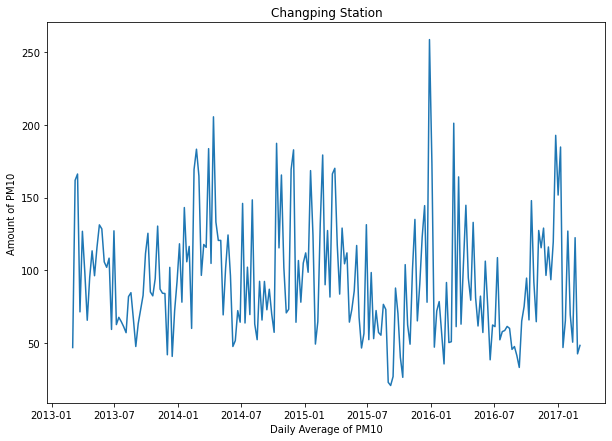

In [12]:
#lineplot for Changping Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_chang_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Weekly Average of PM10')
plt.title("Changping Station");

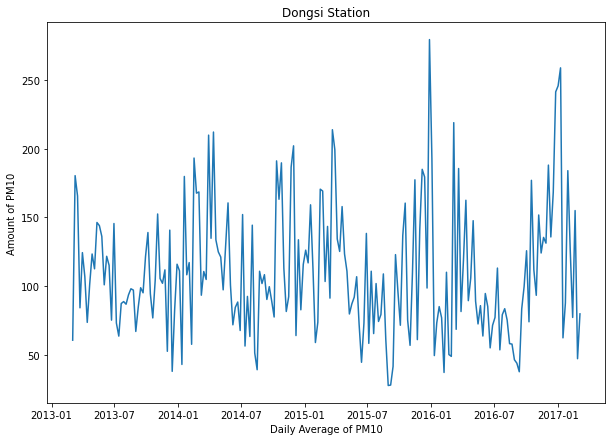

In [13]:
#lineplot for Dongsi Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_dong_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Dongsi Station");

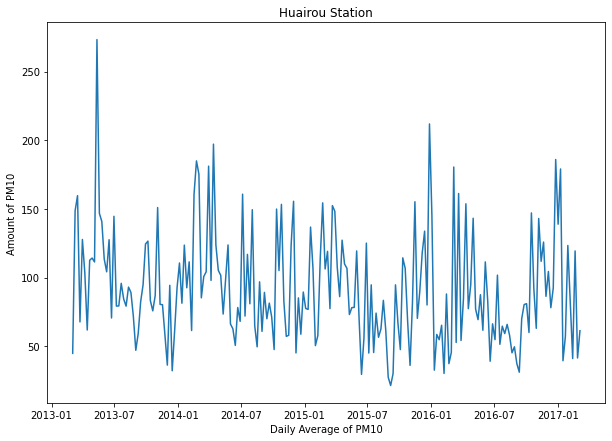

In [14]:
#lineplot for Huairou Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_huai_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Huairou Station");

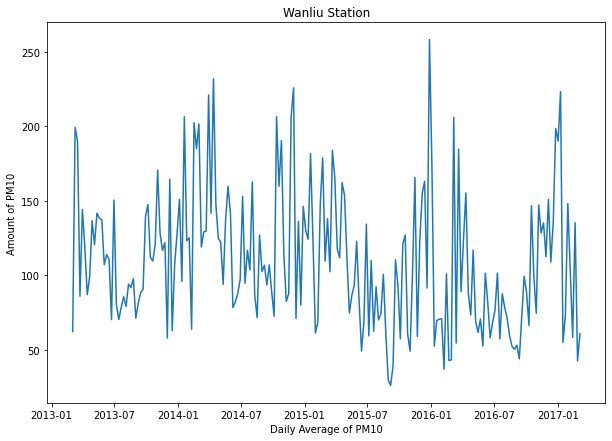

In [16]:
#lineplot for Wanliu Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_wanl_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Wanliu Station");

<b>Observations</b>

- There are no obvious patterns in the PM10 time series plot.
- There does not appear to be a general trend increasing or decreasing.
- There may be a seasonal variation where there are some spikes at the beginning to the mid of the year. 

## Decomposition

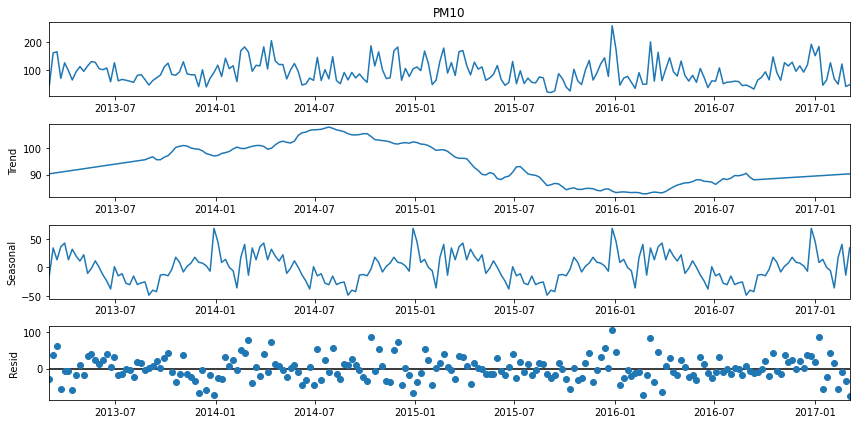

In [17]:
plt.rcParams['figure.figsize'] = (12, 6)

#Changping Station
decomposition_chang = sm.tsa.seasonal_decompose(df_chang_avg.PM10, model='additive', extrapolate_trend='freq')
fig = decomposition_chang.plot()

Did weekly because could not discern any trend, seasonal, and residuals.

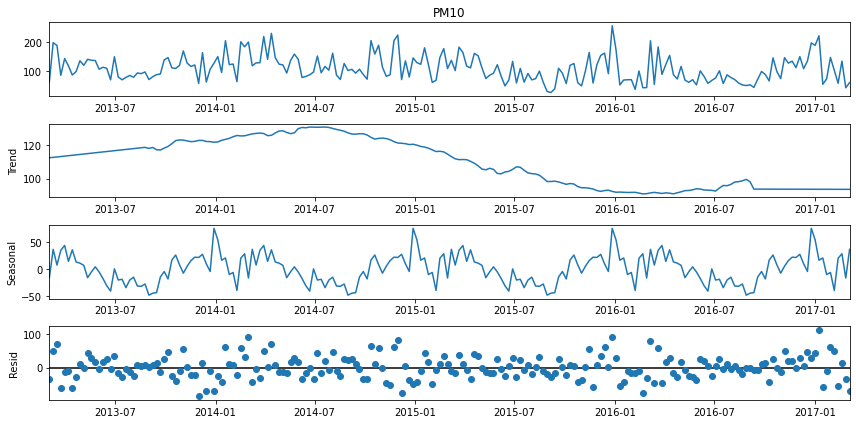

In [18]:
#Wanliu Station
decomposition_wanl = sm.tsa.seasonal_decompose(df_wanl_avg.PM10, model='additive', extrapolate_trend='freq')
fig = decomposition_wanl.plot()

<b>Observed</b>
- The Observed plot shows the average weekly PM10 values.
- The Trend plot indicates that there is an overall decreasing trend for the stations.
- The Seasonal plot identifies repeating patterns that reach their lowest value about 60% of the way through each year. The maximum values are near the start of each year.
- The Residual plot reflects the remaining noise in the dataset after removing the other variation types. There are no patterns present.

-----

## Data Preprocessing

In [38]:
#necessary imports 
from statsmodels.tsa.stattools import adfuller

### Train Test Split

In [39]:
#find the index which allows us to split off 20% of the data
pct_train = 0.80


#Changping Station
cutoff_c = round(len(df_chang_avg) * pct_train)

#Dongsi Station
cutoff_d = round(len(df_dong_avg) * pct_train)

#Huairou Station
cutoff_h = round(len(df_huai_avg) * pct_train)

#Wanliu Station
cutoff_w = round(len(df_wanl_avg) * pct_train)
cutoff_w

168

In [40]:
#Changping Station 
train_chang, test_chang = df_chang_avg[:cutoff_c], df_chang_avg[cutoff_c:]

#Dongsi Station
train_dong, test_dong = df_dong_avg[:cutoff_d], df_dong_avg[cutoff_d:]

#Huairou Station
train_huai, test_huai = df_huai_avg[:cutoff_h], df_huai_avg[cutoff_h:]

#Wanliu Station
train_wanl, test_wanl = df_wanl_avg[:cutoff_w], df_wanl_avg[cutoff_w:]

In [23]:
#checking nulls 
train_list = [train_chang, train_dong, train_huai, train_wanl]

print('Total null values')   
for df in train_list:
    print(df.isna().sum().sum())

Total null values
0
17
0
7


In [44]:
test_wanl.tail()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2017-02-05,34428.5,91.988095,103.369048,30.916667,63.648810,1580.239521,41.904762,-0.156696,1022.563294,-17.989881,0.000000,1.446429
2017-02-12,34596.5,41.215569,58.263473,16.221557,45.233533,962.424242,53.826347,0.320536,1023.931548,-16.739881,0.000000,2.220833
2017-02-19,34764.5,117.820359,135.203593,27.000000,82.880240,1905.454545,32.455090,3.111905,1018.184524,-11.053571,0.000000,1.708333
2017-02-26,34932.5,28.615385,42.509554,8.853503,49.343949,731.210191,44.184713,2.785714,1020.820833,-11.139881,0.024405,1.648810
2017-03-05,35040.5,36.979167,60.750000,12.553191,64.851064,1048.936170,36.782609,8.868750,1014.450000,-9.300000,0.000000,1.558333


In [24]:
#imputing the missing values with the median
#Changping
train_chang = train_chang.fillna(train_chang.median())

#Dongsi
train_dong = train_dong.fillna(train_dong.median())

#Huairou
train_huai = train_huai.fillna(train_huai.median())

#Wanliu
train_wanl = train_wanl.fillna(train_wanl.median())

### Checking for Stationarity

In [26]:
#Changping 
#autolag set to AIC to minimize it
chang_dft = adfuller(train_chang['PM10'], autolag='AIC')
output_chang = pd.Series(chang_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_chang

test statistic             -2.952427
pvalue                      0.039582
number of lags used        11.000000
number of observations    156.000000
dtype: float64

In [27]:
#Dongsi
dong_dft = adfuller(train_dong['PM10'], autolag='AIC')
output_dong = pd.Series(dong_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_dong

test statistic             -4.616759
pvalue                      0.000120
number of lags used         3.000000
number of observations    164.000000
dtype: float64

In [28]:
#Huairou
huai_dft = adfuller(train_huai['PM10'], autolag='AIC')
output_huai = pd.Series(huai_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_huai

test statistic           -1.071993e+01
pvalue                    3.169995e-19
number of lags used       0.000000e+00
number of observations    1.670000e+02
dtype: float64

In [29]:
#Wanliu
wanl_dft = adfuller(train_wanl['PM10'], autolag='AIC')
output_wanl = pd.Series(wanl_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_wanl

test statistic             -4.409844
pvalue                      0.000285
number of lags used         3.000000
number of observations    164.000000
dtype: float64

All of the stations have a p-value which is less than 0.05. The series are stationary; therefore can proceed with the modeling without having to difference.

---

## Modeling

In [31]:
#!pip install pmdarima

In [32]:
#pip install --upgrade numpy

In [30]:
#importing necessary libraries
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm

In [31]:
#functions
#train data
def find_rmse(model, train_data=train_chang):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data.PM10, y_hat))

#test data
def find_rmse_test(model, test_data=test_chang):
    y_hat = model.predict(start=test_data.PM10.index[0], end=test_data.PM10.index[-1])
    return np.sqrt(mean_squared_error(test_data.PM10, y_hat))

## Changping Station
### Baseline Model

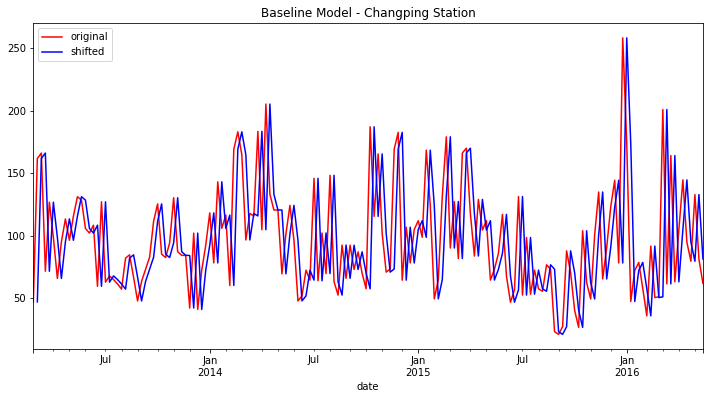

In [33]:
base_chang = train_chang['PM10'].shift(1)

fig, ax = plt.subplots()

train_chang.PM10.plot(ax=ax, c='r', label='original')
base_chang.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model - Changping Station')
ax.legend();

In [35]:
np.sqrt(mean_squared_error(train_chang.PM10[1:], base_chang.dropna()))

51.70829535648783

### First Simple Model - Autoregressive Model (AR)

In [36]:
ar_chang = ARIMA(train_chang['PM10'], order=(1, 0, 0)).fit()
ar_chang.predict(typ='levels')

date
2013-03-03     96.425002
2013-03-10     86.003450
2013-03-17    110.258237
2013-03-24    111.167225
2013-03-31     91.175785
                 ...    
2016-04-17    106.633616
2016-04-24     96.094294
2016-05-01     92.868915
2016-05-08    104.150522
2016-05-15     93.240459
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [37]:
ar_chang.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -859.190
Date:                Mon, 07 Nov 2022   AIC                           1724.380
Time:                        17:15:16   BIC                           1733.752
Sample:                    03-03-2013   HQIC                          1728.184
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.4250      4.655     20.715      0.000      87.302     105.548
ar.L1          0.2115      0.075      2.826      0.005       0.065       0.358
sigma2      1616.0296    170.853      9.459      0.000    1281.163    1950.896
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                33.44
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             0.95
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Moving Average (MA) Model 

In [38]:
ma_chang = ARIMA(train_chang['PM10'], order=(0, 0, 1)).fit()
ma_chang.predict(typ='levels')

date
2013-03-03     96.388313
2013-03-10     88.204354
2013-03-17    108.973701
2013-03-24    106.165858
2013-03-31     90.475807
                 ...    
2016-04-17    104.170959
2016-04-24     94.795586
2016-05-01     93.790636
2016-05-08    103.088035
2016-05-15     92.672449
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [39]:
ma_chang.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -859.974
Date:                Mon, 07 Nov 2022   AIC                           1725.949
Time:                        17:15:25   BIC                           1735.320
Sample:                    03-03-2013   HQIC                          1729.752
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.3883      4.334     22.239      0.000      87.894     104.883
ma.L1          0.1711      0.073      2.345      0.019       0.028       0.314
sigma2      1635.7881    175.361      9.328      0.000    1292.086    1979.490
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                32.55
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
print("AR Model:")
print(f"Train set RMSE: {find_rmse(ar_chang)}")
print(f"Test set RMSE: {find_rmse_test(ar_chang)}")

print("\n")

print("MA Model:")
print(f"Train set RMSE: {find_rmse(ma_chang)}")
print(f"Test set RMSE: {find_rmse_test(ma_chang)}")

AR Model:
Train set RMSE: 40.25968519229775
Test set RMSE: 40.648842576887404


MA Model:
Train set RMSE: 40.447359153402985
Test set RMSE: 40.68171774754363


The Baseline Model RMSE was 94.54, so can see that the AR Model and MA Model significantly improved from this score in both test and train sets. However, for both models the train did 10 points better than the test which is not very good, could mean that there is some overfitting in the models.

The AR Model did perform slightly better MA Model.

### PACF & ACF Charts

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


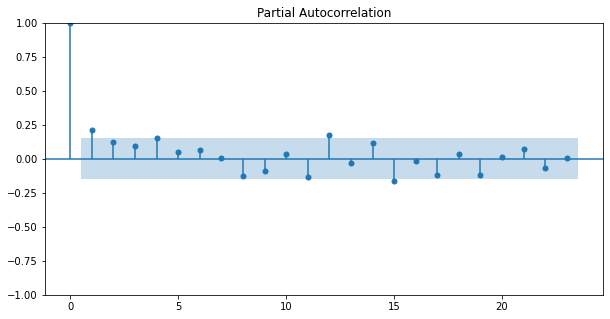

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_chang['PM10'], ax=ax);

Possible p values: 1, 2, or 8. The others that are slighlty above the confidence interval like 21 and 27 are not worth it.

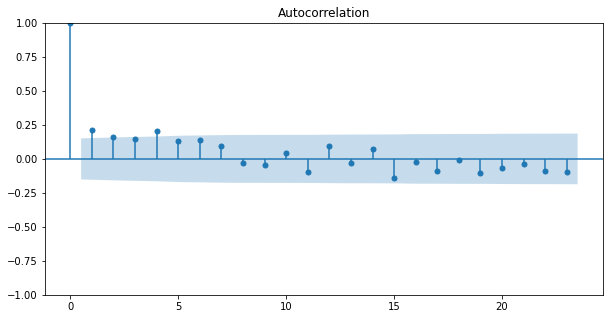

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_chang['PM10'], ax=ax);

Possible values of q to try would be 1, 2, or 3. Could also try 8, 9, 10, and 11. Others that are above the confidence interval (shaded part) are not worth it since there are so many before them that are within the shaded part.

### ARIMA Models - Tuning Based on ACF & PACF Charts

In [43]:
arima_chang1 = ARIMA(train_chang['PM10'], order=(1, 0, 1)).fit()
arima_chang1.predict(typ='levels')

date
2013-03-03     96.424182
2013-03-10     85.828426
2013-03-17    101.619226
2013-03-24    111.856903
2013-03-31    102.642474
                 ...    
2016-04-17    105.646655
2016-04-24    102.395663
2016-05-01     97.741756
2016-05-08    103.205825
2016-05-15     98.571858
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [44]:
arima_chang1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -855.882
Date:                Mon, 07 Nov 2022   AIC                           1719.763
Time:                        17:15:55   BIC                           1732.259
Sample:                    03-03-2013   HQIC                          1724.835
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.4242      7.000     13.775      0.000      82.704     110.144
ar.L1          0.8361      0.132      6.358      0.000       0.578       1.094
ma.L1         -0.6748      0.170     -3.970      0.000      -1.008      -0.342
sigma2      1556.6939    164.251      9.478      0.000    1234.769    1878.619
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                34.44
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.97
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#second ARIMA model
arima_chang2 = ARIMA(train_chang['PM10'], order=(8, 0, 9)).fit()
arima_chang2.predict(typ='levels')

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


date
2013-03-03     96.711199
2013-03-10     87.849841
2013-03-17    103.190826
2013-03-24    111.019120
2013-03-31     93.855206
                 ...    
2016-04-17    102.615404
2016-04-24     79.680718
2016-05-01     56.374154
2016-05-08     90.029658
2016-05-15     92.247773
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [47]:
arima_chang2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(8, 0, 9)   Log Likelihood               -6362.093
Date:                Mon, 07 Nov 2022   AIC                          12762.186
Time:                        16:39:45   BIC                          12858.400
Sample:                    03-01-2013   HQIC                         12798.476
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0479      7.588     12.790      0.000      82.176     111.920
ar.L1          1.2759      2.144      0.595      0.552      -2.926       5.478
ar.L2         -0.7642      3.190     -0.240      0.811      -7.017       5.488
ar.L3          0.0643      1.811      0.035      0.972      -3.485       3.614
ar.L4          0.3769      0.449      0.839      0.401      -0.503       1.257
ar.L5         -0.2222      1.144     -0.194      0.846      -2.465       2.020
ar.L6          0.4333      0.765      0.566      0.571      -1.066       1.933
ar.L7         -0.3029      0.751     -0.403      0.687      -1.776       1.170
ar.L8          0.0948      0.602      0.158      0.875      -1.084       1.274
ma.L1         -0.6664      2.145     -0.311      0.756      -4.871       3.538
ma.L2          0.1883      1.966      0.096      0.924      -3.665       4.041
ma.L3          0.2282      0.354      0.645      0.519      -0.465       0.922
ma.L4         -0.3530      0.641     -0.550      0.582      -1.610       0.904
ma.L5          0.0502      1.026      0.049      0.961      -1.960       2.061
ma.L6         -0.3463      0.351     -0.985      0.324      -1.035       0.342
ma.L7         -0.0355      0.520     -0.068      0.946      -1.055       0.984
ma.L8          0.1368      0.331      0.414      0.679      -0.511       0.785
ma.L9         -0.0397      0.548     -0.072      0.942      -1.113       1.033
sigma2      3114.9185     99.006     31.462      0.000    2920.870    3308.967
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               443.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.69
Prob(H) (two-sided):                  0.50   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_chang1)}")
print(f"Test set RMSE: {find_rmse_test(arima_chang1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_chang2)}")
print(f"Test set RMSE: {find_rmse_test(arima_chang2)}")

ARIMA Model 1: 
Train set RMSE: 39.49065586261966
Test set RMSE: 40.37340339052237


ARIMA Model 2: 
Train set RMSE: 35.918292230055854
Test set RMSE: 43.7582088967631


The second ARIMA model had a slight improvement from the previous AR, MA, and ARIMA models. However, the test set did not improve by much. 

### SARIMA Model

In [47]:
SARIMA_c = pm.auto_arima(train_chang.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=True, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

SARIMA_c.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1324.343, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1274.448, Time=4.55 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=10.89 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1298.102, Time=0.59 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1275.001, Time=17.86 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=1274.998, Time=9.10 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=11.46 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=1277.006, Time=26.65 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1302.288, Time=2.97 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=1268.726, Time=6.19 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1291.582, Time=1.07 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=1268.731, Time=25.07 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=15.48 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=17.43 sec
 ARIMA(2,1,0)(2,1,1)[52]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -618.232
Date:                             Mon, 07 Nov 2022   AIC                           1242.464
Time:                                     17:29:50   BIC                           1250.699
Sample:                                 03-03-2013   HQIC                          1245.807
                                      - 05-15-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9500      0.037    -25.381      0.000      -1.023      -0.877
ar.S.L52      -0.5054      0.103     -4.917      0.000      -0.707      -0.304
sigma2      2347.6739    285.875      8.212      0.000    1787.369    2907.978
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                13.15
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             0.62
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
#RMSE
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_chang.PM10, SARIMA_c.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_chang.PM10, SARIMA_c.predict(n_periods=test_chang.shape[0]))))

Training RMSE: 49.64
Testing RMSE: 41.88


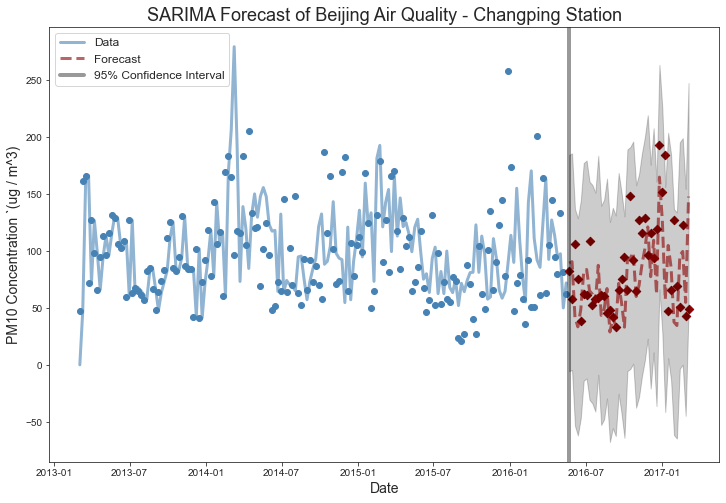

In [75]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_chang.index, train_chang.PM10, color='steelblue', marker='o')
plt.plot(train_chang.index, SARIMA_c.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_c, ci_test_c = SARIMA_c.predict(n_periods=test_chang.shape[0], return_conf_int=True)
ci_lower_c = pd.Series(ci_test_c[:, 0], index=test_chang.index)
ci_upper_c = pd.Series(ci_test_c[:, 1], index=test_chang.index)
plt.scatter(test_chang.index, test_chang.PM10, color='darkred', marker='D')
plt.plot(test_chang.index, SARIMA_c.predict(n_periods=test_chang.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Changping Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_chang_avg.PM10.index[cutoff_c], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_c.index, ci_lower_c, ci_upper_c, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

## Dongsi Station

### Baseline

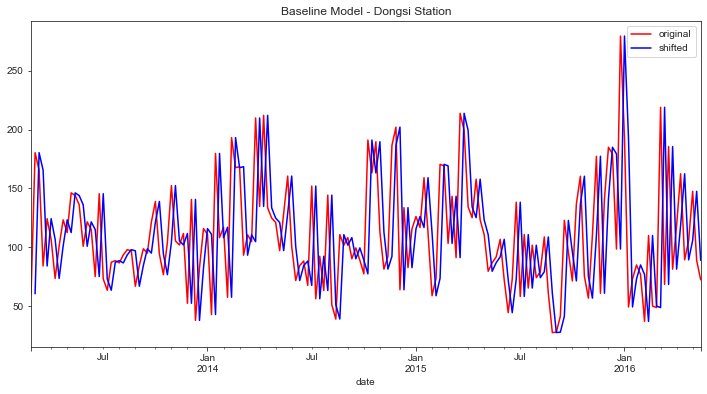

In [52]:
base_dong = train_dong['PM10'].shift(1)

fig, ax = plt.subplots()

train_dong.PM10.plot(ax=ax, c='r', label='original')
base_dong.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model - Dongsi Station')
ax.legend();

In [53]:
#RMSE for baseline model
np.sqrt(mean_squared_error(train_dong.PM10[1:], base_dong.dropna()))

57.83759493083038

### AR Model

In [54]:
ar_dong = ARIMA(train_dong['PM10'], order=(1, 0, 0)).fit()
ar_dong.predict(typ='levels')

date
2013-03-03    110.309072
2013-03-10    102.421214
2013-03-17    121.441761
2013-03-24    119.089523
2013-03-31    106.163511
                 ...    
2016-04-17    118.596534
2016-04-24    106.989121
2016-05-01    109.601907
2016-05-08    116.236225
2016-05-15    106.920276
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [55]:
ar_dong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -874.233
Date:                Mon, 07 Nov 2022   AIC                           1754.467
Time:                        17:37:02   BIC                           1763.839
Sample:                    03-03-2013   HQIC                          1758.271
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.3091      4.552     24.233      0.000     101.387     119.231
ar.L1          0.1589      0.071      2.240      0.025       0.020       0.298
sigma2      1935.4285    210.041      9.215      0.000    1523.757    2347.100
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                18.92
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.76
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA Model

In [56]:
ma_dong = ARIMA(train_dong['PM10'], order=(0, 0, 1)).fit()
ma_dong.predict(typ='levels')

date
2013-03-03    110.272781
2013-03-10    103.485250
2013-03-17    120.994307
2013-03-24    116.490156
2013-03-31    105.770942
                 ...    
2016-04-17    117.277579
2016-04-24    106.385873
2016-05-01    110.199371
2016-05-08    115.491529
2016-05-15    106.574645
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [57]:
ma_dong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -874.517
Date:                Mon, 07 Nov 2022   AIC                           1755.034
Time:                        17:37:07   BIC                           1764.406
Sample:                    03-03-2013   HQIC                          1758.838
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.2728      4.383     25.161      0.000     101.683     118.863
ma.L1          0.1395      0.071      1.973      0.048       0.001       0.278
sigma2      1945.0898    213.011      9.131      0.000    1527.597    2362.583
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                18.98
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.76
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
print("AR Model:")
print(f"Train set RMSE: {find_rmse(ar_dong)}")
print(f"Test set RMSE: {find_rmse_test(ar_dong)}")

print("\n")


print("MA Model:")
print(f"Train set RMSE: {find_rmse(ma_dong)}")
print(f"Test set RMSE: {find_rmse_test(ma_dong)}")

AR Model:
Train set RMSE: 42.59748017244609
Test set RMSE: 46.53114635213947


MA Model:
Train set RMSE: 42.72132435742991
Test set RMSE: 46.55228874843594


The Baseline Model RMSE was 57.83, so can see that the AR Model and MA Model significantly improved from this score in both test and train sets. However, for both models the train did 4 points better than the test which is not very good, could mean that there is some overfitting in the models.

The AR Model did perform slightly better MA Model.

### PACF & ACF Charts

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


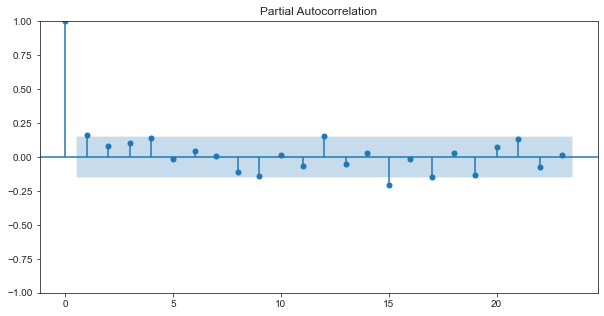

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_dong['PM10'], ax=ax);

Can try the p value being equal to 1, 2, or 8. All other values are within the shaded region of the confidence interval.

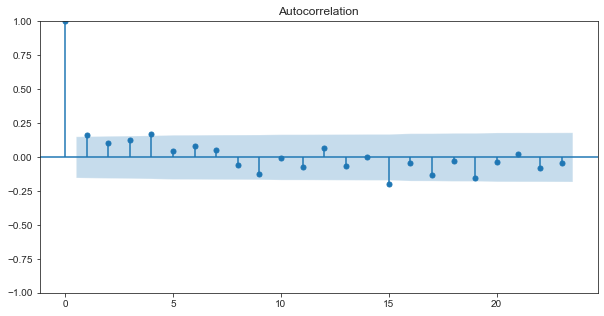

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_dong['PM10'], ax=ax);

Can try the following values for q: 1, 2, 3, 9, or 10. 

### ARIMA Model

In [62]:
arima_dong1 = ARIMA(train_dong['PM10'], order=(1, 0, 1)).fit()
arima_dong1.predict(typ='levels')

date
2013-03-03    110.225746
2013-03-10    102.104162
2013-03-17    115.444416
2013-03-24    121.300401
2013-03-31    113.698202
                 ...    
2016-04-17    118.603186
2016-04-24    112.750007
2016-05-01    111.244765
2016-05-08    115.952130
2016-05-15    110.998288
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [63]:
arima_dong1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -872.530
Date:                Mon, 07 Nov 2022   AIC                           1753.060
Time:                        17:44:49   BIC                           1765.556
Sample:                    03-03-2013   HQIC                          1758.131
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.2257      6.054     18.206      0.000      98.359     122.092
ar.L1          0.7744      0.210      3.694      0.000       0.364       1.185
ma.L1         -0.6386      0.254     -2.515      0.012      -1.136      -0.141
sigma2      1898.6635    218.611      8.685      0.000    1470.194    2327.133
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.93
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.74
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
#second ARIMA model
arima_dong2 = ARIMA(train_dong['PM10'], order=(2, 0, 2)).fit()
arima_dong2.predict(typ='levels')

date
2013-03-03    110.227266
2013-03-10    102.966238
2013-03-17    111.717379
2013-03-24    125.283734
2013-03-31    112.586980
                 ...    
2016-04-17    126.041500
2016-04-24    107.375585
2016-05-01    116.261169
2016-05-08    110.519853
2016-05-15    117.067539
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [65]:
arima_dong2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -871.500
Date:                Mon, 07 Nov 2022   AIC                           1755.000
Time:                        17:44:53   BIC                           1773.744
Sample:                    03-03-2013   HQIC                          1762.607
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.2273      6.185     17.822      0.000      98.105     122.350
ar.L1         -0.2088      0.227     -0.920      0.358      -0.654       0.236
ar.L2          0.7357      0.228      3.221      0.001       0.288       1.183
ma.L1          0.3333      0.271      1.230      0.219      -0.198       0.864
ma.L2         -0.5717      0.278     -2.059      0.040      -1.116      -0.027
sigma2      1874.3086    213.765      8.768      0.000    1455.338    2293.280
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                12.66
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                             0.65
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
#third ARIMA model
arima_dong3 = ARIMA(train_dong['PM10'], order=(2, 0, 3)).fit()
arima_dong3.predict(typ='levels')

date
2013-03-03    110.318058
2013-03-10    104.835738
2013-03-17    118.756165
2013-03-24    108.639023
2013-03-31    108.228329
                 ...    
2016-04-17    113.598490
2016-04-24    105.611417
2016-05-01    112.868245
2016-05-08    111.830165
2016-05-15    108.348232
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [67]:
arima_dong3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -865.118
Date:                Mon, 07 Nov 2022   AIC                           1744.235
Time:                        17:44:58   BIC                           1766.103
Sample:                    03-03-2013   HQIC                          1753.110
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.3181      4.941     22.326      0.000     100.634     120.003
ar.L1          1.1928      0.074     16.042      0.000       1.047       1.339
ar.L2         -0.7071      0.069    -10.188      0.000      -0.843      -0.571
ma.L1         -1.1790      0.298     -3.959      0.000      -1.763      -0.595
ma.L2          0.6699      0.363      1.846      0.065      -0.041       1.381
ma.L3          0.2319      0.123      1.889      0.059      -0.009       0.473
sigma2      1686.1064    670.443      2.515      0.012     372.062    3000.151
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                10.42
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               1.81   Skew:                             0.61
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_dong1)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_dong2)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong2)}")

print("\n")

print("ARIMA Model 3: ")
print(f"Train set RMSE: {find_rmse(arima_dong3)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong3)}")

ARIMA Model 1: 
Train set RMSE: 41.99635676037825
Test set RMSE: 46.205707504468634


ARIMA Model 2: 
Train set RMSE: 41.71305180981623
Test set RMSE: 46.021407789337275


ARIMA Model 3: 
Train set RMSE: 41.078453184765245
Test set RMSE: 46.49287004387273


The train data performed slighlty better but the test data performed around the same compared to the AR and MA models. The ARIMA Model that perforemed the best was the third one.

### SARIMA Model 

In [69]:
SARIMA_d = pm.auto_arima(train_dong.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=True, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

SARIMA_d.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1341.441, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1302.476, Time=3.72 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=10.80 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1319.484, Time=0.59 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=18.98 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=19.74 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=14.18 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=34.66 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1326.477, Time=3.00 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=1295.767, Time=6.14 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1310.856, Time=1.05 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=28.09 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=23.74 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=17.05 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=inf, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 52)   Log Likelihood                -634.703
Date:                            Mon, 07 Nov 2022   AIC                           1279.405
Time:                                    17:53:17   BIC                           1293.130
Sample:                                03-03-2013   HQIC                          1284.976
                                     - 05-15-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6774      0.087     -7.776      0.000      -0.848      -0.507
ar.L2         -0.5008      0.094     -5.344      0.000      -0.685      -0.317
ar.L3         -0.3935      0.088     -4.481      0.000      -0.566      -0.221
ar.S.L52      -0.4914      0.106     -4.620      0.000      -0.700      -0.283
sigma2      3196.1309    422.008      7.574      0.000    2369.011    4023.251
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.75
Prob(Q):                              0.94   Prob(JB):                         0.25
Heteroskedasticity (H):               1.43   Skew:                             0.35
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
#RMSE
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_dong.PM10, SARIMA_d.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_dong.PM10, 
                                                        SARIMA_d.predict(n_periods=test_dong.shape[0]))))

Training RMSE: 57.94
Testing RMSE: 54.61


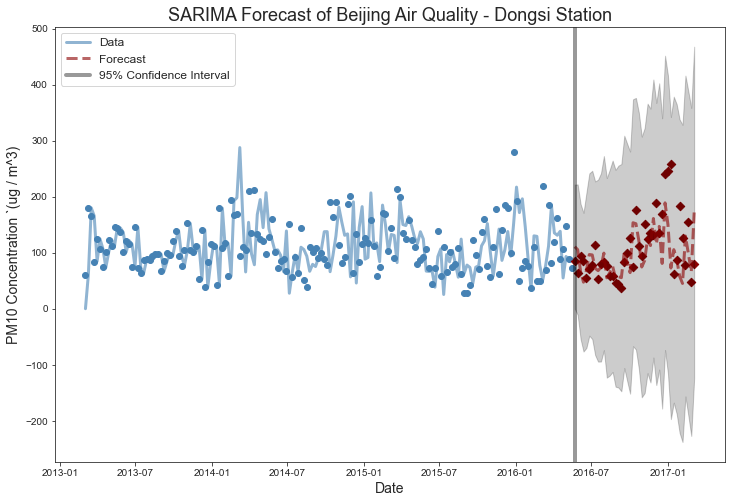

In [112]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_dong.index, train_dong.PM10, color='steelblue', marker='o')
plt.plot(train_dong.index, SARIMA_d.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_d, ci_test_d = SARIMA_d.predict(n_periods=test_dong.shape[0], return_conf_int=True)
ci_lower_d = pd.Series(ci_test_d[:, 0], index=test_dong.index)
ci_upper_d = pd.Series(ci_test_d[:, 1], index=test_dong.index)
plt.scatter(test_dong.index, test_dong.PM10, color='darkred', marker='D')
plt.plot(test_dong.index, SARIMA_d.predict(n_periods=test_dong.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Dongsi Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_dong_avg.PM10.index[cutoff_d], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_d.index, ci_lower_d, ci_upper_d, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

## Huairou Station 
### Baseline Model

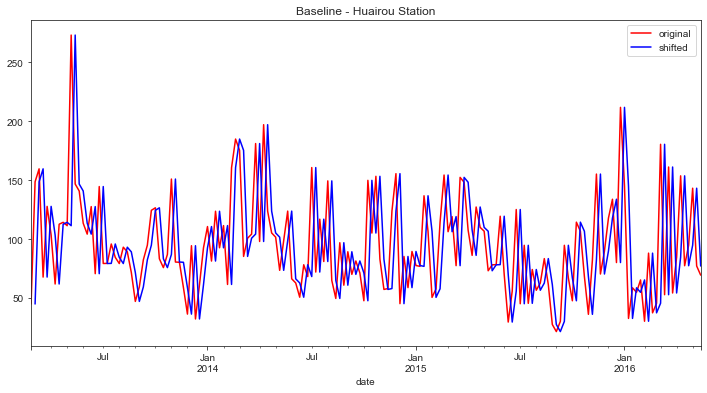

In [78]:
base_huai = train_huai['PM10'].shift(1)

fig, ax = plt.subplots()

train_huai.PM10.plot(ax=ax, c='r', label='original')
base_huai.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Huairou Station')
ax.legend();

In [79]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_huai.PM10[1:], base_huai.dropna()))

52.022378171678746

### AR Model

In [80]:
ar_huai = ARIMA(train_huai['PM10'], order=(1, 0, 0)).fit()
ar_huai.predict(typ='levels')

date
2013-03-03     94.175717
2013-03-10     85.154606
2013-03-17    104.135187
2013-03-24    106.147042
2013-03-31     89.336770
                 ...    
2016-04-17    105.060623
2016-04-24     91.100127
2016-05-01     94.290073
2016-05-08    103.139552
2016-05-15     91.058107
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [81]:
ar_huai.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -858.125
Date:                Mon, 07 Nov 2022   AIC                           1722.250
Time:                        18:08:10   BIC                           1731.622
Sample:                    03-03-2013   HQIC                          1726.053
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.1757      4.399     21.409      0.000      85.554     102.798
ar.L1          0.1828      0.082      2.225      0.026       0.022       0.344
sigma2      1599.8733    152.657     10.480      0.000    1300.670    1899.076
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                43.55
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.97
Prob(H) (two-sided):                  0.69   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA Model

In [82]:
ma_huai = ARIMA(train_huai['PM10'], order=(0, 0, 1)).fit()
ma_huai.predict(typ='levels')

date
2013-03-03     94.239891
2013-03-10     87.037637
2013-03-17    103.416547
2013-03-24    102.619980
2013-03-31     89.037633
                 ...    
2016-04-17    103.146279
2016-04-24     90.396423
2016-05-01     94.896257
2016-05-08    101.438455
2016-05-15     90.616661
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [83]:
ma_huai.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -858.685
Date:                Mon, 07 Nov 2022   AIC                           1723.370
Time:                        18:08:15   BIC                           1732.742
Sample:                    03-03-2013   HQIC                          1727.173
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2399      4.145     22.738      0.000      86.117     102.363
ma.L1          0.1490      0.081      1.837      0.066      -0.010       0.308
sigma2      1610.8670    153.464     10.497      0.000    1310.082    1911.652
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                43.58
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.97
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
print("AR Model: ")
print(f"Train set RMSE: {find_rmse(ar_huai)}")
print(f"Test set RMSE: {find_rmse_test(ar_huai)}")

print("\n")

print("MA Model: ")
print(f"Train set RMSE: {find_rmse(ma_huai)}")
print(f"Test set RMSE: {find_rmse_test(ma_huai)}")

AR Model: 
Train set RMSE: 40.60879766084787
Test set RMSE: 40.0992735218183


MA Model: 
Train set RMSE: 40.71933821177556
Test set RMSE: 40.13792380231361


The Baseline Model RMSE was 92.29, so can see that the AR Model and MA Model significantly improved from this score in both test and train sets. However, for both models the train did 8 points better than the test which is not okay, could mean that there is some slight overfitting in the models.

The AR Model did perform slightly better MA Model.

### PACF & ACF Charts

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


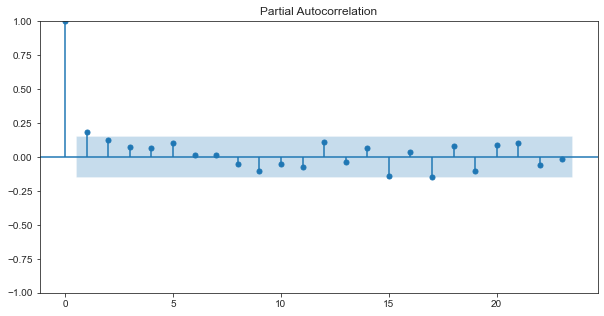

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_huai['PM10'], ax=ax);

Possible p values: 1 or 2.

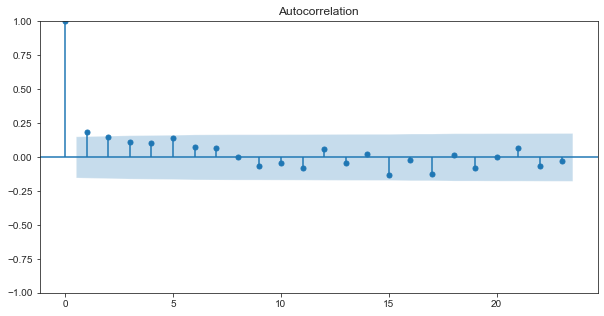

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_huai['PM10'], ax=ax);

Possible q values: 1, 2, or 10.

### ARIMA Model

In [87]:
arima_huai1 = ARIMA(train_huai['PM10'], order=(1, 0, 1)).fit()
arima_huai1.predict(typ='levels')

date
2013-03-03     94.275830
2013-03-10     85.069592
2013-03-17     97.449501
2013-03-24    106.479653
2013-03-31     98.025850
                 ...    
2016-04-17    101.576288
2016-04-24     96.421353
2016-05-01     95.730484
2016-05-08    102.541813
2016-05-15     97.006094
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [88]:
arima_huai1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -855.972
Date:                Mon, 07 Nov 2022   AIC                           1719.943
Time:                        18:08:33   BIC                           1732.439
Sample:                    03-03-2013   HQIC                          1725.015
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2758      6.119     15.408      0.000      82.284     106.268
ar.L1          0.7912      0.186      4.260      0.000       0.427       1.155
ma.L1         -0.6413      0.233     -2.751      0.006      -1.098      -0.184
sigma2      1558.8654    152.526     10.220      0.000    1259.919    1857.812
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                45.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             1.01
Prob(H) (two-sided):                  0.75   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
#second ARIMA model
arima_huai2 = ARIMA(train_huai['PM10'], order=(2, 0, 2)).fit()
arima_huai2.predict(typ='levels')

date
2013-03-03     94.274754
2013-03-10     85.375820
2013-03-17     96.573968
2013-03-24    106.409787
2013-03-31     98.989582
                 ...    
2016-04-17    101.031935
2016-04-24     97.132904
2016-05-01     95.699896
2016-05-08    102.161005
2016-05-15     97.600975
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [90]:
arima_huai2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -855.958
Date:                Mon, 07 Nov 2022   AIC                           1723.915
Time:                        18:08:39   BIC                           1742.659
Sample:                    03-03-2013   HQIC                          1731.523
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2748      6.150     15.330      0.000      82.222     106.328
ar.L1          0.6436      7.327      0.088      0.930     -13.717      15.005
ar.L2          0.1090      5.845      0.019      0.985     -11.347      11.565
ma.L1         -0.5018      7.328     -0.068      0.945     -14.864      13.860
ma.L2         -0.0744      4.792     -0.016      0.988      -9.466       9.317
sigma2      1559.5779    153.056     10.190      0.000    1259.594    1859.561
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                45.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             1.01
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_huai1)}")
print(f"Test set RMSE: {find_rmse_test(arima_huai1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_huai2)}")
print(f"Test set RMSE: {find_rmse_test(arima_huai2)}")

ARIMA Model 1: 
Train set RMSE: 40.113171145954446
Test set RMSE: 40.04433724837887


ARIMA Model 2: 
Train set RMSE: 40.10709755064025
Test set RMSE: 40.035253785557124


For both ARIMA Models, train improved slightly compared to the AR and MA Models, and the test is not much improvement. ARIMA Model 2 did better in train but ARIMA Model 1 performed better in the test.

### SARIMA Model

In [92]:
SARIMA_h = pm.auto_arima(train_huai.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=True, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

SARIMA_h.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1325.878, Time=0.26 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1283.631, Time=3.70 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=8.76 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1297.392, Time=0.68 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1284.980, Time=15.59 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=1284.979, Time=7.85 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=6.99 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=1286.981, Time=21.41 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=1309.786, Time=2.93 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=1277.561, Time=5.30 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=1290.994, Time=0.99 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=1278.172, Time=23.22 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=1278.168, Time=15.55 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=8.54 sec
 ARIMA(2,1,0)(2,1,1)[52]      

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(5, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -625.036
Date:                              Mon, 07 Nov 2022   AIC                           1264.071
Time:                                      18:20:42   BIC                           1283.286
Sample:                                  03-03-2013   HQIC                          1271.870
                                       - 05-15-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7974      0.103     -7.774      0.000      -0.999      -0.596
ar.L2         -0.6282      0.119     -5.275      0.000      -0.862      -0.395
ar.L3         -0.5291      0.130     -4.074      0.000      -0.784      -0.275
ar.L4         -0.3566      0.146     -2.447      0.014      -0.642      -0.071
ar.L5         -0.1798      0.103     -1.753      0.080      -0.381       0.021
ma.S.L52      -0.5644      0.230     -2.451      0.014      -1.016      -0.113
sigma2      2603.2722    553.195      4.706      0.000    1519.030    3687.515
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.31
Prob(Q):                              0.96   Prob(JB):                         0.02
Heteroskedasticity (H):               0.84   Skew:                            -0.24
Prob(H) (two-sided):                  0.59   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
#RMSE 
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_huai.PM10, SARIMA_h.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_huai.PM10, 
                                                        SARIMA_h.predict(n_periods=test_huai.shape[0]))))

Training RMSE: 54.75
Testing RMSE: 40.81


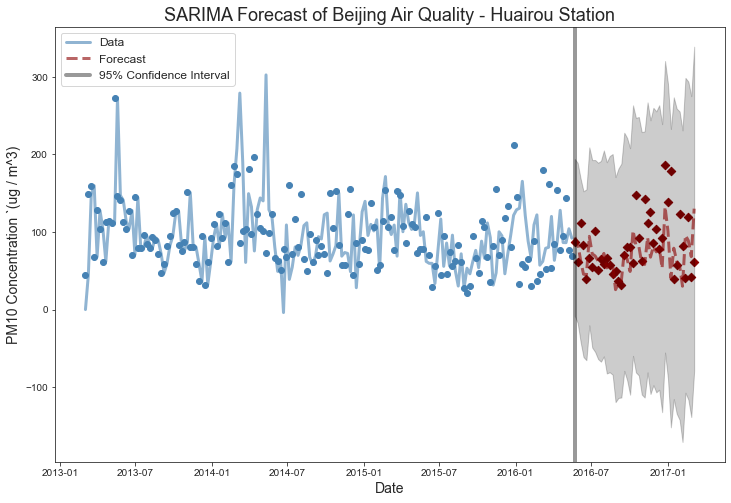

In [94]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_huai.index, train_huai.PM10, color='steelblue', marker='o')
plt.plot(train_huai.index, SARIMA_h.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_h, ci_test_h = SARIMA_h.predict(n_periods=test_huai.shape[0], return_conf_int=True)
ci_lower_h = pd.Series(ci_test_h[:, 0], index=test_huai.index)
ci_upper_h = pd.Series(ci_test_h[:, 1], index=test_huai.index)
plt.scatter(test_huai.index, test_huai.PM10, color='darkred', marker='D')
plt.plot(test_huai.index, SARIMA_h.predict(n_periods=test_huai.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Huairou Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_huai_avg.PM10.index[cutoff_h], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_h.index, ci_lower_h, ci_upper_h, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();

## Wanliu Station
### Baseline Model

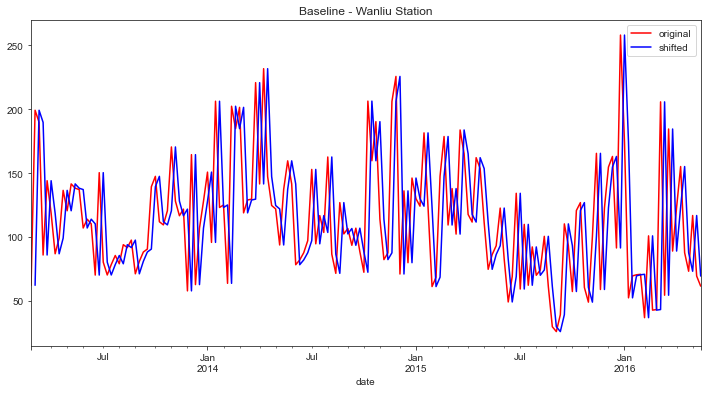

In [95]:
base_wanl = train_wanl['PM10'].shift(1)

fig, ax = plt.subplots()

train_wanl.PM10.plot(ax=ax, c='r', label='original')
base_wanl.plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Wanliu Station')
ax.legend();

In [96]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_wanl.PM10[1:], base_wanl.dropna()))

56.437962772264434

### AR Model

In [97]:
ar_wanl = ARIMA(train_wanl['PM10'], order=(1, 0, 0)).fit()
ar_wanl.predict(typ='levels')

date
2013-03-03    113.799964
2013-03-10    102.804850
2013-03-17    132.014207
2013-03-24    129.991923
2013-03-31    107.859733
                 ...    
2016-04-17    122.622140
2016-04-24    108.238770
2016-05-01    105.147709
2016-05-08    114.448944
2016-05-15    104.347412
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [98]:
ar_wanl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -874.119
Date:                Mon, 07 Nov 2022   AIC                           1754.237
Time:                        18:28:09   BIC                           1763.609
Sample:                    03-03-2013   HQIC                          1758.041
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.8000      4.855     23.442      0.000     104.285     123.315
ar.L1          0.2132      0.072      2.959      0.003       0.072       0.354
sigma2      1931.6965    225.414      8.570      0.000    1489.893    2373.500
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                14.86
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.71
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA Model

In [99]:
ma_wanl = ARIMA(train_wanl['PM10'], order=(0, 0, 1)).fit()
ma_wanl.predict(typ='levels')

date
2013-03-03    113.758809
2013-03-10    105.074842
2013-03-17    130.089823
2013-03-24    124.115252
2013-03-31    107.131487
                 ...    
2016-04-17    120.453610
2016-04-24    108.075691
2016-05-01    107.707332
2016-05-08    115.344786
2016-05-15    105.793938
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [100]:
ma_wanl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -874.880
Date:                Mon, 07 Nov 2022   AIC                           1755.760
Time:                        18:28:12   BIC                           1765.132
Sample:                    03-03-2013   HQIC                          1759.564
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.7588      4.513     25.209      0.000     104.914     122.603
ma.L1          0.1736      0.073      2.377      0.017       0.030       0.317
sigma2      1953.3148    230.225      8.484      0.000    1502.082    2404.548
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                14.32
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.70
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
print("AR Model: ")
print(f"Train set RMSE: {find_rmse(ar_wanl)}")
print(f"Test set RMSE: {find_rmse_test(ar_wanl)}")

print("\n")

print("MA Model: ")
print(f"Train set RMSE: {find_rmse(ma_wanl)}")
print(f"Test set RMSE: {find_rmse_test(ma_wanl)}")

AR Model: 
Train set RMSE: 43.75531885797578
Test set RMSE: 48.42257204405568


MA Model: 
Train set RMSE: 43.894947592596495
Test set RMSE: 48.50459998722236


The Baseline Model RMSE was 104.74, so can see that the AR Model and MA Model significantly improved from this score in both test and train sets. However, for both models the train did 12 points better than the test which is not very good, could mean that there is overfitting in the models.

The AR Model did perform slightly better MA Model.

### PACF & ACF Charts

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


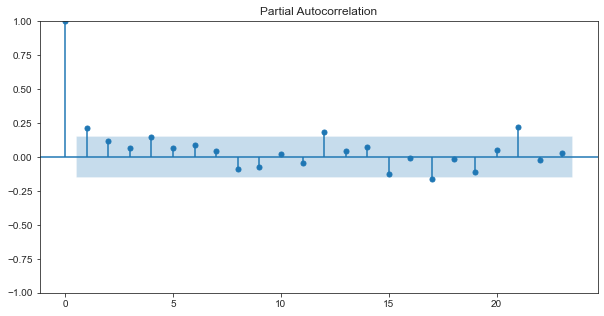

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_wanl['PM10'], ax=ax);

Possible p values 1, 2, or 8.

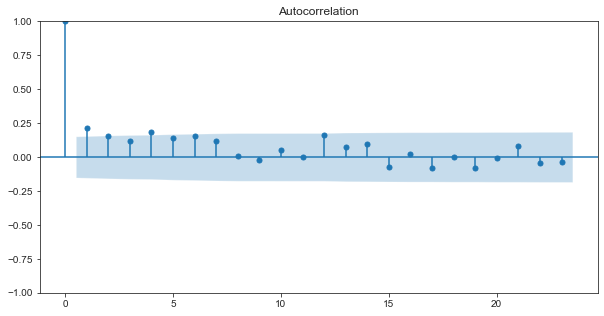

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_wanl['PM10'], ax=ax);

Possible q values: 1 or 2.

### ARIMA Models

In [104]:
arima_wanl1 = ARIMA(train_wanl['PM10'], order=(1, 0, 1)).fit()
arima_wanl1.predict(typ='levels')

date
2013-03-03    113.479125
2013-03-10    103.088759
2013-03-17    121.161815
2013-03-24    131.137721
2013-03-31    121.969205
                 ...    
2016-04-17    119.170505
2016-04-24    113.888818
2016-05-01    107.953431
2016-05-08    109.950118
2016-05-15    104.548126
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [105]:
arima_wanl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -871.004
Date:                Mon, 07 Nov 2022   AIC                           1750.008
Time:                        18:28:28   BIC                           1762.504
Sample:                    03-03-2013   HQIC                          1755.079
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.4791      7.767     14.610      0.000      98.256     128.702
ar.L1          0.8714      0.105      8.306      0.000       0.666       1.077
ma.L1         -0.7267      0.141     -5.146      0.000      -1.004      -0.450
sigma2      1863.5176    224.789      8.290      0.000    1422.940    2304.096
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                15.27
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             0.73
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
#second ARIMA model
arima_wanl2 = ARIMA(train_wanl['PM10'], order=(1, 0, 2)).fit()
arima_wanl2.predict(typ='levels')

date
2013-03-03    113.752951
2013-03-10    102.868312
2013-03-17    122.693768
2013-03-24    131.494660
2013-03-31    120.728432
                 ...    
2016-04-17    119.465690
2016-04-24    113.099659
2016-05-01    107.494875
2016-05-08    110.394688
2016-05-15    104.262664
Freq: W-SUN, Name: predicted_mean, Length: 168, dtype: float64

In [107]:
arima_wanl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                  168
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -870.985
Date:                Mon, 07 Nov 2022   AIC                           1751.970
Time:                        18:28:31   BIC                           1767.590
Sample:                    03-03-2013   HQIC                          1758.309
                         - 05-15-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.7530      7.797     14.589      0.000      98.470     129.035
ar.L1          0.8775      0.113      7.797      0.000       0.657       1.098
ma.L1         -0.7215      0.140     -5.140      0.000      -0.997      -0.446
ma.L2         -0.0169      0.079     -0.214      0.830      -0.171       0.138
sigma2      1863.7214    227.864      8.179      0.000    1417.116    2310.327
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             0.74
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
print("ARIMA Model 1: ")
print(f"Train set RMSE: {find_rmse(arima_wanl1)}")
print(f"Test set RMSE: {find_rmse_test(arima_wanl1)}")

print("\n")

print("ARIMA Model 2: ")
print(f"Train set RMSE: {find_rmse(arima_wanl2)}")
print(f"Test set RMSE: {find_rmse_test(arima_wanl2)}")

ARIMA Model 1: 
Train set RMSE: 43.118961733700075
Test set RMSE: 46.34824393801379


ARIMA Model 2: 
Train set RMSE: 43.164217916399565
Test set RMSE: 46.473298231952064


Both models had slight improvements in the train and test sets compared to the AR and MA Models, not very significant though. The ARIMA Model 1 performed slighlty better than the ARIMA Model 2 in the train but the ARIMA Model 2 performed slighlty better in the test.

### SARIMA Model

In [109]:
SARIMA_w = pm.auto_arima(train_wanl.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=True, m=52, trace=True,
                             error_action='ignore', suppress_warnings=True, stepwise=True)  

SARIMA_w.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1335.869, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=1295.092, Time=3.92 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=7.35 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=1316.004, Time=0.63 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=1294.989, Time=18.75 sec
 ARIMA(1,1,0)(3,1,0)[52]             : AIC=inf, Time=87.14 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=30.58 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=10.21 sec
 ARIMA(1,1,0)(3,1,1)[52]             : AIC=inf, Time=149.21 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=1321.880, Time=14.85 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=23.07 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=1258.235, Time=31.51 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=1257.974, Time=11.13 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=1271.494, Time=1.95 sec
 ARIMA(1,1,1)(1,1,1)[52]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                -625.024
Date:                             Mon, 07 Nov 2022   AIC                           1256.048
Time:                                     18:39:57   BIC                           1264.283
Sample:                                 03-03-2013   HQIC                          1259.391
                                      - 05-15-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9355      0.040    -23.220      0.000      -1.014      -0.857
ar.S.L52      -0.4759      0.102     -4.670      0.000      -0.676      -0.276
sigma2      2695.5287    382.825      7.041      0.000    1945.205    3445.853
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.68   Prob(JB):                         0.15
Heteroskedasticity (H):               1.41   Skew:                             0.40
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
#RMSE
print('Training RMSE: %.2f' % np.sqrt(mean_squared_error(train_wanl.PM10, SARIMA_w.predict_in_sample())))
print('Testing RMSE: %.2f' % np.sqrt(mean_squared_error(test_wanl.PM10, 
                                                        SARIMA_w.predict(n_periods=test_wanl.shape[0]))))

Training RMSE: 55.48
Testing RMSE: 51.19


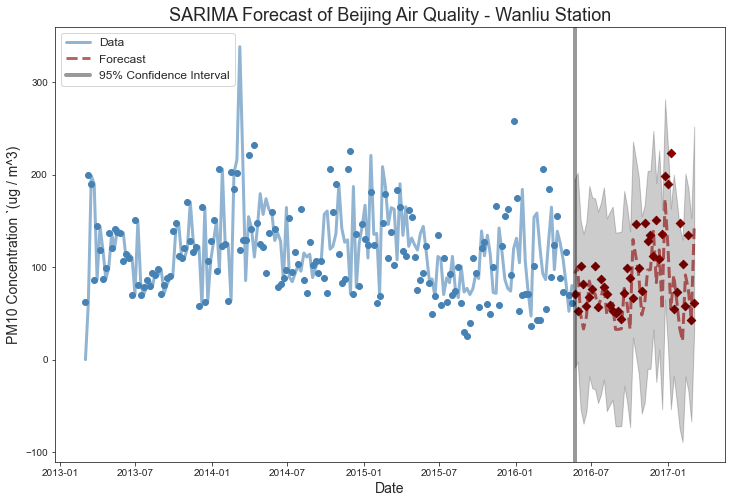

In [111]:
plt.figure(figsize=(12, 8))
sns.set_style('ticks')

plt.scatter(train_wanl.index, train_wanl.PM10, color='steelblue', marker='o')
plt.plot(train_wanl.index, SARIMA_w.predict_in_sample(), color='steelblue', linewidth=3, alpha=0.6)

fit_test_w, ci_test_w = SARIMA_w.predict(n_periods=test_wanl.shape[0], return_conf_int=True)
ci_lower_w = pd.Series(ci_test_w[:, 0], index=test_wanl.index)
ci_upper_w = pd.Series(ci_test_w[:, 1], index=test_wanl.index)
plt.scatter(test_wanl.index, test_wanl.PM10, color='darkred', marker='D')
plt.plot(test_wanl.index, SARIMA_w.predict(n_periods=test_wanl.shape[0]), color='darkred', linestyle='--', linewidth=3, alpha=0.6)

plt.title('SARIMA Forecast of Beijing Air Quality - Wanliu Station', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('PM10 Concentration `(ug / m^3)', fontsize=14)
plt.axvline(x=df_wanl_avg.PM10.index[cutoff_w], color='black', linewidth=4, alpha=0.4)
plt.fill_between(ci_lower_w.index, ci_lower_w, ci_upper_w, color='k', alpha=0.2)
plt.legend(('Data', 'Forecast', '95% Confidence Interval'), loc='best', prop={'size': 12})
plt.show();